# Modeling

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1">Modeling</a></span></li></ul></div>

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np


In [5]:
from tools.tools import read_json, get_current_time

In [6]:
config = read_json('../config.json')

current_date = get_current_time('yyyymmdd')

wd = f"{config['workspace_directory']}/data"

In [162]:
df = pd.read_csv(f"{wd}/processing/basin_int_viirs_for_modeling.csv")

In [163]:
df.head(3)

,year_month,region,obs_day_cnt_avg,obs_day_cnt_med,obs_day_cnt_sum,obs_day_cnt_min,obs_day_cnt_max,qf_fit_day_avg_avg,qf_fit_day_avg_med,qf_fit_day_avg_sum,...,qf_fit_day_min_sum_per_squaremeters,qf_fit_day_min_min_per_squaremeters,qf_fit_day_min_max_per_squaremeters,qf_fit_day_max_avg_per_squaremeters,qf_fit_day_max_med_per_squaremeters,qf_fit_day_max_sum_per_squaremeters,qf_fit_day_max_min_per_squaremeters,qf_fit_day_max_max_per_squaremeters,month,oil_bbl_d_total_production
0,2012-03-01,Anadarko Region,13.041667,12.5,313,3,33,4.786164,4.291667,114.867926,...,0.0,0.0,0.0,4.185230e-10,4.505471e-10,1.004455e-08,0.0,7.023235e-10,2012-03-01,254203.561
1,2012-03-01,Appalachia Region,31.071429,32.0,870,1,86,9.502222,8.966184,266.062205,...,0.0,0.0,0.0,1.925259e-10,1.769157e-10,5.390726e-09,0.0,2.757804e-10,2012-03-01,32000.000
2,2012-03-01,Bakken Region,260.321429,249.0,7289,2,571,1.497039,1.500962,41.917086,...,0.0,0.0,0.0,2.919411e-10,3.725575e-10,8.174350e-09,0.0,5.807514e-10,2012-03-01,595203.806


In [164]:
df = df[df['region'] == 'Permian Region']  # select just permian basin

In [165]:
df.isnull().sum()

year_month                             0
region                                 0
obs_day_cnt_avg                        0
obs_day_cnt_med                        0
obs_day_cnt_sum                        0
                                      ..
qf_fit_day_max_sum_per_squaremeters    0
qf_fit_day_max_min_per_squaremeters    0
qf_fit_day_max_max_per_squaremeters    0
month                                  0
oil_bbl_d_total_production             0
Length: 65, dtype: int64

In [166]:
X = df.drop(columns=[
    'region',
    'year_month',
    'month', 
    'oil_bbl_d_total_production',
])
y = df['oil_bbl_d_total_production']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [167]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
model.score(X_train, y_train)

0.9640061656601727

In [169]:
model.score(X_test, y_test)

0.9083222076787368

In [170]:
cross_val_score(model, X_test, y_test, cv=5).mean()

-3.7866801992113883

In [171]:
regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

/Users/danielmsheehan/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [172]:
regressor.score(X_train, y_train)

0.954042773704769

In [173]:
regressor.score(X_test, y_test)

0.9071169980750533

In [174]:
#cross_val_score(regressor, X, y, cv=3)

In [175]:
X_train.shape

(72, 61)

In [176]:
X_test.shape

(25, 61)

In [177]:
extratrees = ExtraTreesRegressor(random_state=42, n_estimators=500)

extratrees.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)

In [178]:
extratrees.score(X_train, y_train)

1.0

In [190]:
extratrees.score(X_test, y_test)

0.9424825484007405

In [191]:
#cross_val_score(extratrees, X, y, cv=2).mean()

In [192]:
extratrees.feature_importances_.sort

<function ndarray.sort>

In [193]:
important_features = pd.Series(data=extratrees.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

print(important_features)

qf_fit_day_med_med                  0.489386
qf_fit_day_med_avg                  0.229353
qf_fit_day_sum_med                  0.067931
qf_fit_day_med_sum                  0.051309
qf_fit_day_sum_avg                  0.024195
                                      ...   
obs_day_cnt_max_per_squaremeters    0.000000
obs_day_cnt_min_per_squaremeters    0.000000
obs_day_cnt_sum_per_squaremeters    0.000000
obs_day_cnt_med_per_squaremeters    0.000000
aland                               0.000000
Length: 61, dtype: float64


In [194]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

{'Bakken Region': (0.4, 0.7607843137254902, 0.6470588235294118)}


<Figure size 864x864 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/danielmsheehan/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


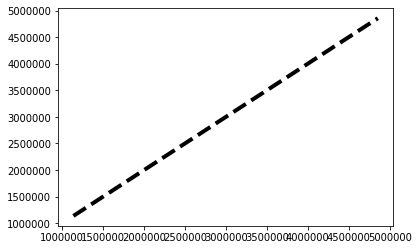

In [195]:
predicted = cross_val_predict(extratrees, X, y, cv=10)

#color_labels = df['region'].unique()
# print(color_labels)
# List of RGB triplets
#rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))

print(color_map)

plt.figure(figsize=(12, 12))
fig, ax = plt.subplots()
plt.scatter(y, predicted, edgecolors=(0, 0, 0), c=df['region'].map(color_map))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
# plt.legend()
plt.show()

In [157]:
resids = y - predicted

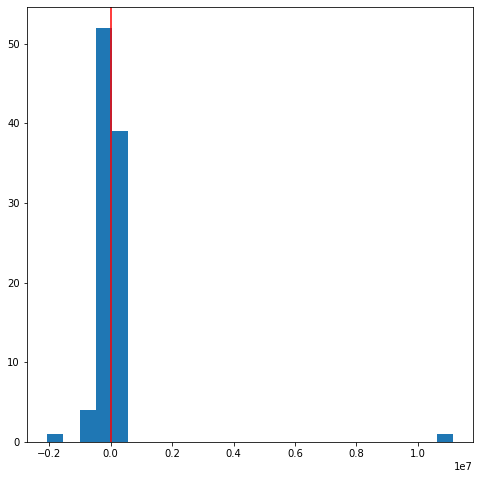

In [158]:
# Normality of residuals assumption
plt.figure(figsize=(8, 8))

plt.hist(resids, bins=25);
plt.axvline(0, color='red')

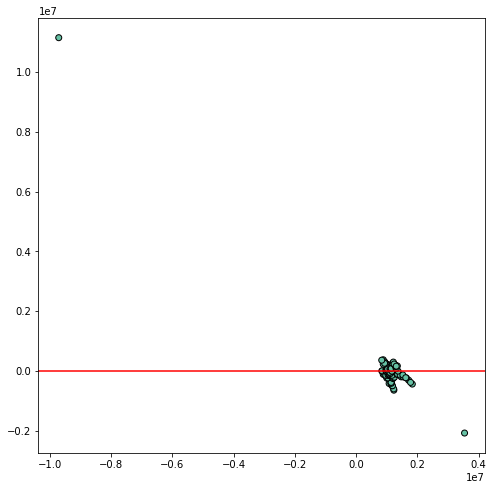

In [159]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 8))

plt.scatter(predicted, resids, edgecolors='black', c=df['region'].map(color_map))

#legend_elements = [Patch(facecolor='orange', edgecolor='r', label='Color Patch')]
# plt.legend(handles=[
#     mpatches.Patch(color='red', label='The red data'),
#     mpatches.Patch(color='blue', label='The blue data'),
#     mpatches.Patch(color=(0.8980392156862745,0.7686274509803922,0.5803921568627451), label='Permian Region'),
# ])
plt.axhline(0, color='red');

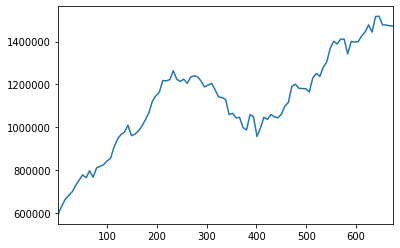

In [161]:
df['oil_bbl_d_total_production'].plot()